In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


2023-01-30 03:50:55.860853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 03:50:56.683953: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 03:50:56.683973: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-30 03:51:03.324644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Load the heart disease data into a Pandas DataFrame

In [13]:

df = pd.read_csv("/home/geftealmeida/my_documents/mlops/API-for-Data-Science/models/heart.csv")

#### Explore the data

In [3]:

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Visualize the data


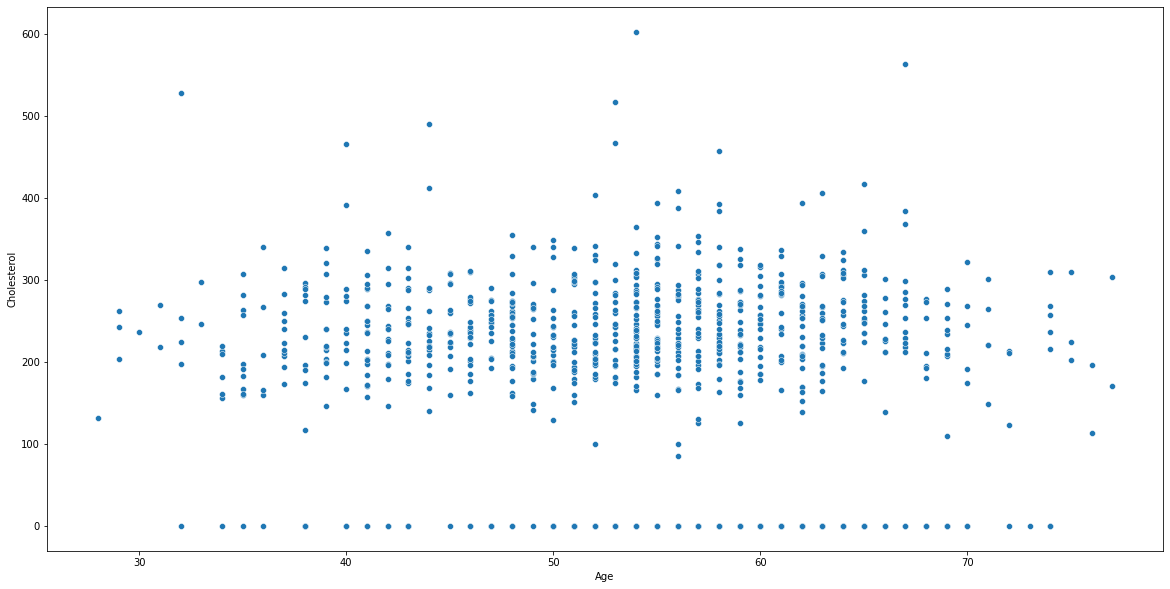

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Age", y="Cholesterol", data=df)
plt.show()

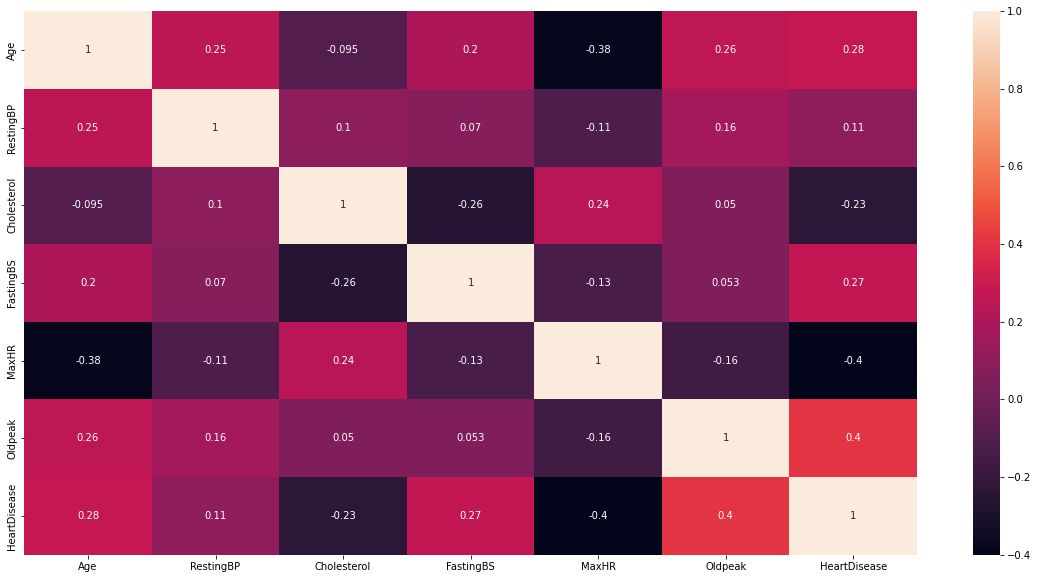

In [19]:
# Calculate the correlation matrix
corr = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

#### Analyze the data


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


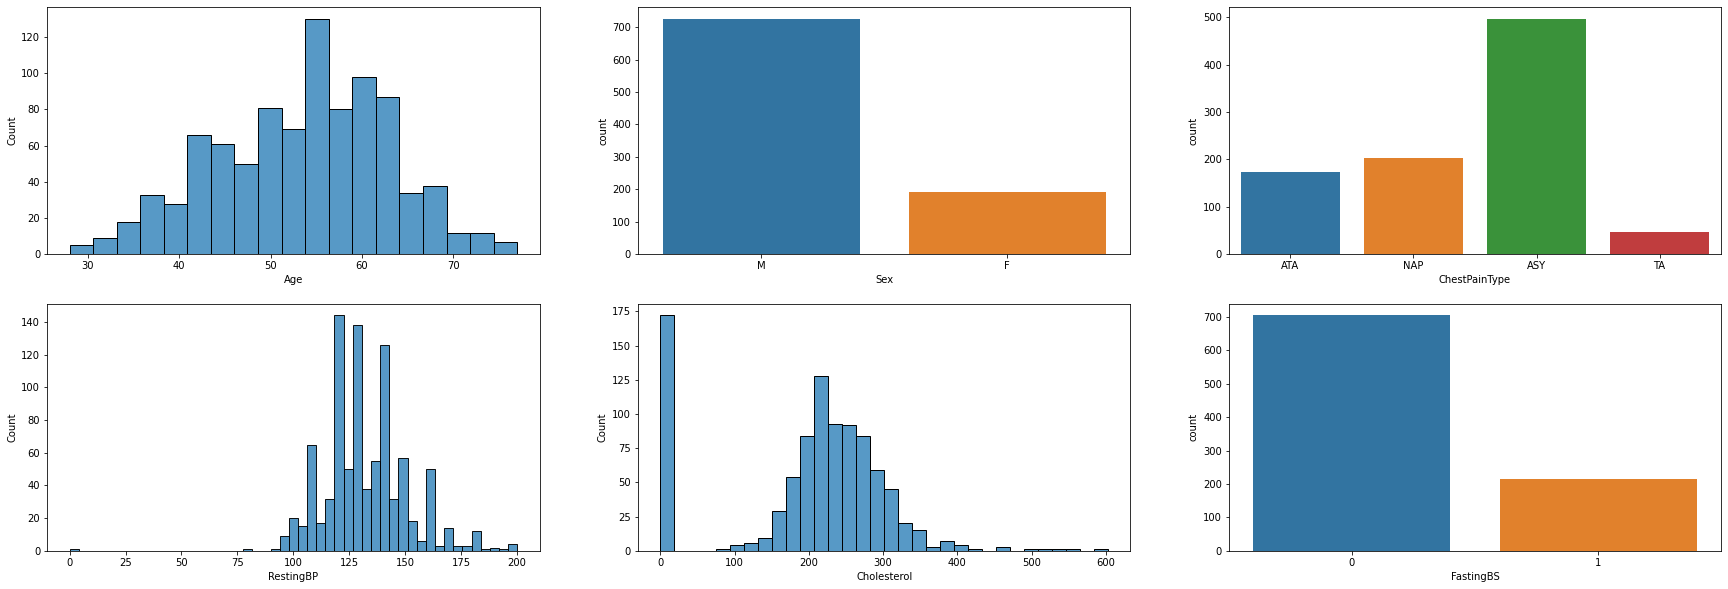

In [39]:

# Create the figure and the subplots
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

# Plot the countplots using Seaborn
sns.histplot(x="Age", data=df, ax=ax[0, 0])
sns.countplot(x="Sex", data=df, ax=ax[0, 1])
sns.countplot(x="ChestPainType", data=df, ax=ax[0, 2])
sns.histplot(x="RestingBP", data=df, ax=ax[1, 0])
sns.histplot(x="Cholesterol", data=df, ax=ax[1, 1])
sns.countplot(x="FastingBS", data=df, ax=ax[1, 2])

# Show the plot
plt.show()

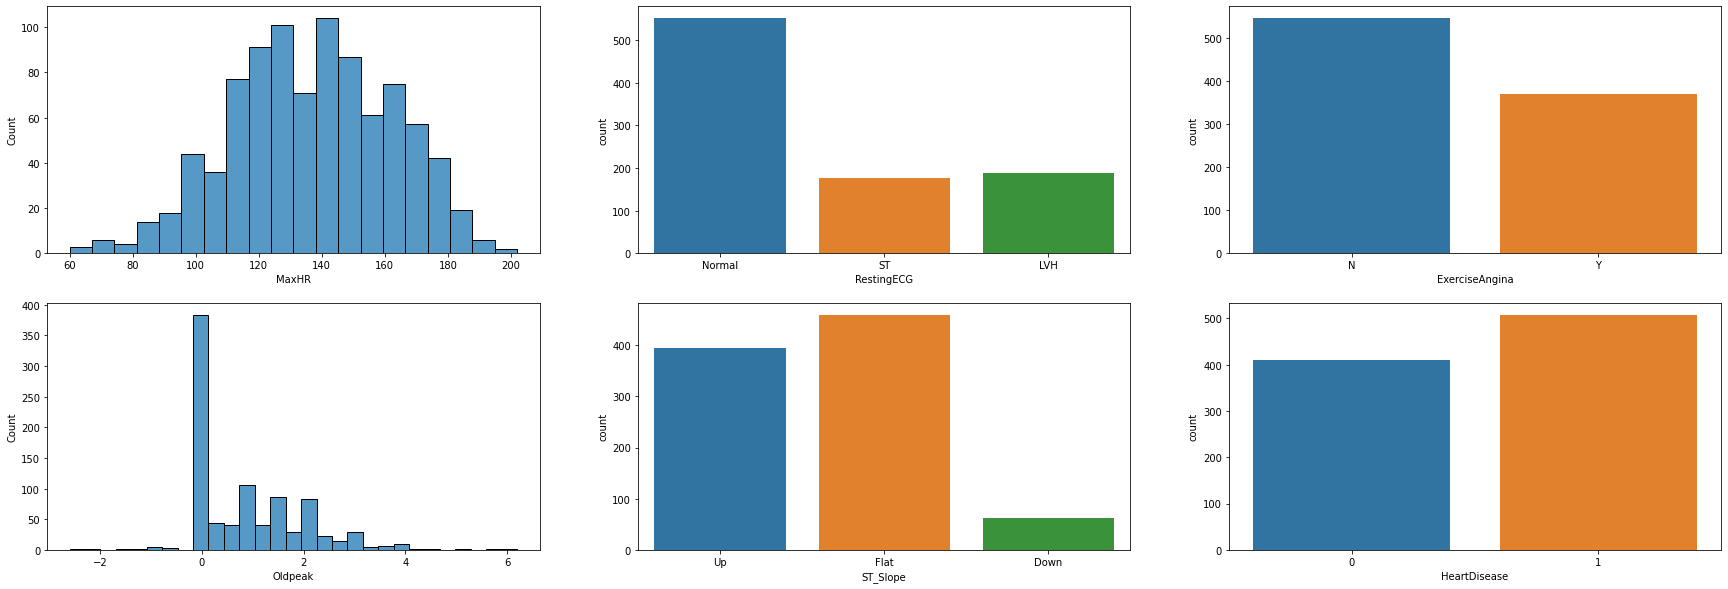

In [38]:
# Create the figure and the subplots
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

# Plot the countplots using Seaborn
sns.histplot(x="MaxHR", data=df, ax=ax[0, 0])
sns.countplot(x="RestingECG", data=df, ax=ax[0, 1])
sns.countplot(x="ExerciseAngina", data=df, ax=ax[0, 2])
sns.histplot(x="Oldpeak", data=df, ax=ax[1, 0])
sns.countplot(x="ST_Slope", data=df, ax=ax[1, 1])
sns.countplot(x="HeartDisease", data=df, ax=ax[1, 2])

# Show the plot
plt.show()

<Figure size 1440x720 with 0 Axes>

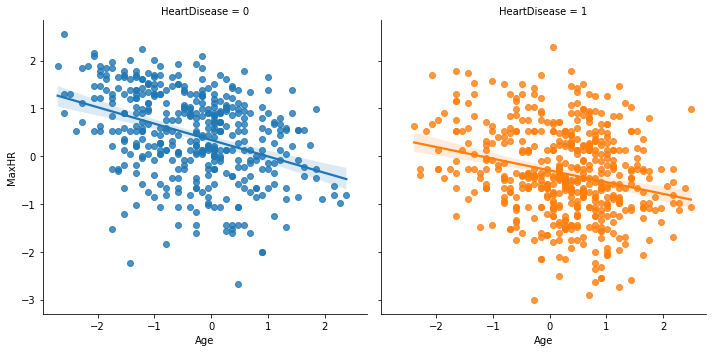

In [75]:

plt.figure(figsize=(20,10))
# Plot the pairplot using Seaborn
sns.lmplot(x='Age', y='MaxHR', data=df, hue='HeartDisease' , col='HeartDisease')

# Show the plot
plt.show()

### Features Engenier

In [15]:
def engineer_features(df, label):
    # Create a list of string columns
    string_columns = [col for col in df.columns if df[col].dtype == "object" and col!=label]
    
    # Iterate over the string columns
    for col in string_columns:
        # Create dummy variables for the string column
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        # Drop the original string column
        df.drop(col, axis=1, inplace=True)
    
    # Select the numerical columns
    numerical_columns = [col for col in df.columns if df[col].dtype != "object" and col!=label]
    
    # Normalize the numerical columns
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    print(scaler.get_params)
    
    return df


In [16]:
df = engineer_features(df, label='HeartDisease')
df.head()

<bound method BaseEstimator.get_params of StandardScaler()>


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,-0.515952,0.515952,-1.084138,...,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1.938163,-1.938163,-1.084138,...,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,-0.515952,0.515952,-1.084138,...,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1.938163,-1.938163,0.922392,...,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,-0.515952,0.515952,-1.084138,...,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674


In [17]:

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train.loc[0]

Age                 -1.433140
RestingBP            0.410909
Cholesterol          0.825070
FastingBS           -0.551341
MaxHR                1.382928
Oldpeak             -0.832432
Sex_F               -0.515952
Sex_M                0.515952
ChestPainType_ASY   -1.084138
ChestPainType_ATA    2.075177
ChestPainType_NAP   -0.532838
ChestPainType_TA    -0.229679
RestingECG_LVH      -0.507478
RestingECG_Normal    0.814275
RestingECG_ST       -0.490449
ExerciseAngina_N     0.823556
ExerciseAngina_Y    -0.823556
ST_Slope_Down       -0.271448
ST_Slope_Flat       -1.002181
ST_Slope_Up          1.150674
Name: 0, dtype: float64

In [10]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [102]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model to the data
history = model.fit(X_train, y_train, epochs=45, batch_size=64)

Epoch 1/45
12/12 [==============================] - 1s 1ms/step - loss: 0.6277 - accuracy: 0.7016
Epoch 2/45
12/12 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.8447
Epoch 3/45
12/12 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8583
Epoch 4/45
12/12 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8678
Epoch 5/45
12/12 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8733
Epoch 6/45
12/12 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8774
Epoch 7/45
12/12 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8815
Epoch 8/45
12/12 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8801
Epoch 9/45
12/12 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.8801
Epoch 10/45
12/12 [==============================] - 0s 4ms/step - loss: 0.2845 - accuracy: 0.8869
Epoch 11/45
12/12 [

In [103]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8967
Test loss: 0.3100000321865082
Test accuracy: 0.89673912525177


<Figure size 432x288 with 0 Axes>

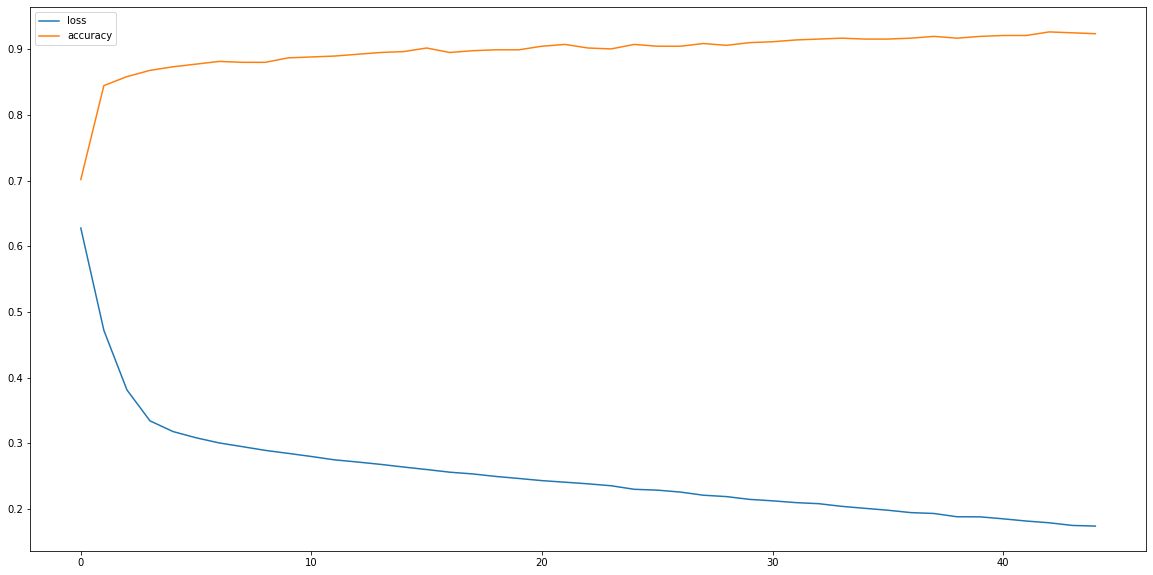

In [104]:
plt.figure()
pd.DataFrame(history.history).plot(figsize=(20,10))
plt.show()

In [112]:
# Import the necessary libraries
def tune_model(X, y, epochs, batch_size, dropout_rate):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Fit the model to the data
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))

    # Save the model
    model.save("model.h5")

    # Plot the training and validation loss
    plt.figure(figsize=(20,10))
    plt.plot(history.history["loss"], label="Training loss")
    plt.plot(history.history["val_loss"], label="Validation loss")


    # Plot the training and validation accuracy
    plt.plot(history.history["accuracy"], label="Training accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation accuracy")
    plt.legend()
    plt.show()


Epoch 1/30
23/23 [==============================] - 1s 9ms/step - loss: 0.6191 - accuracy: 0.6649 - val_loss: 0.4759 - val_accuracy: 0.8315
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7698 - val_loss: 0.4076 - val_accuracy: 0.8370
Epoch 3/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8324 - val_loss: 0.3833 - val_accuracy: 0.8370
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8243 - val_loss: 0.3725 - val_accuracy: 0.8424
Epoch 5/30
23/23 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8433 - val_loss: 0.3646 - val_accuracy: 0.8478
Epoch 6/30
23/23 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8488 - val_loss: 0.3654 - val_accuracy: 0.8478
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8529 - val_loss: 0.3507 - val_accuracy: 0.8587
Epoch 8/30
23/23 [==

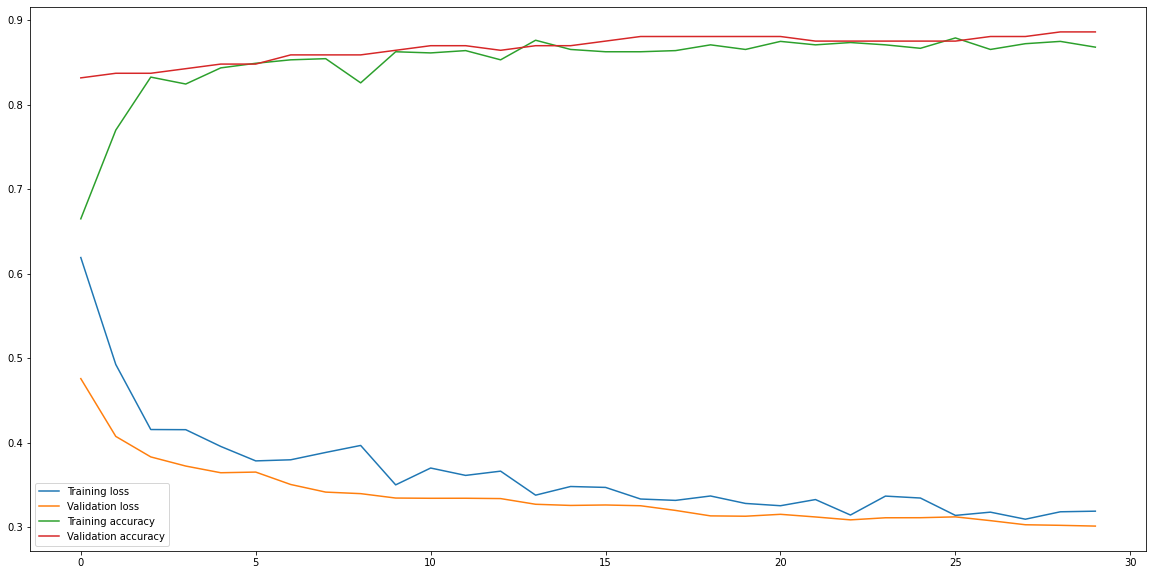

In [113]:
tune_model(X, y, 30, 32, 0.5)